In [100]:
#########################################################################
# MLP(Multi Layer Perceptron) = FC(완전연결망) = Weighted Sum(가중합) 신경망
# Fully Connected (FC, 완전연결) 방법으로 이미지 분류(MNIST)
# 16-1 MNIST : Data 읽기
#########################################################################
from tensorflow.keras.datasets import mnist
import tensorflow as tf

# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [101]:
X_train.shape, Y_class_train.shape, X_test.shape, Y_class_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [102]:
Y_class_train  # label, 정답

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [103]:
X_train[0].shape, Y_class_train[0], X_train[0] 

((28, 28),
 5,
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   

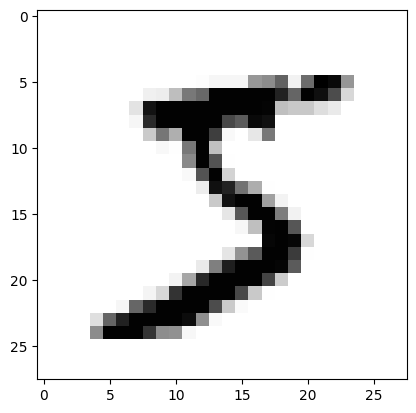

In [105]:
## Matplotlib으로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')  # white와 black이 반전된 colormap
plt.show()

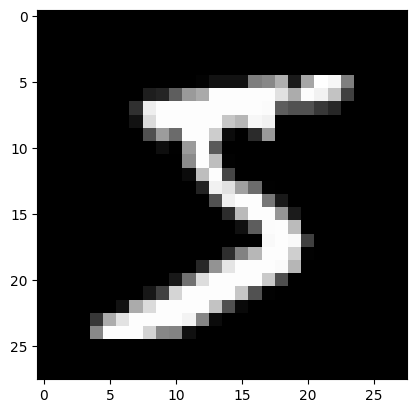

In [8]:
## 정규화 : Normalization -> 학습속도 / 성능(loss, accuracy)에 영향을 줄 수 있다.
import matplotlib.pyplot as plt
plt.imshow(X_train[0]/255 , cmap='gray')  # 0~255 -> 0~1로 변환, X_train[0]/255 : 255로 나누는 것을 정규화라고 함. (**중요)
plt.show()

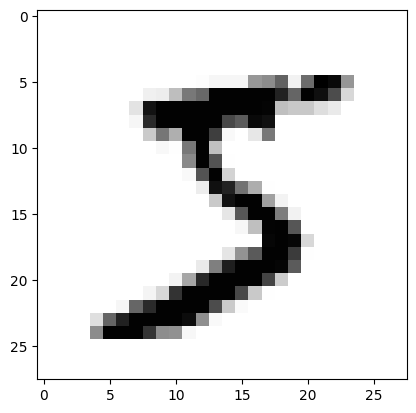

In [9]:
## 0~255-> 0~1로 정규화 (Min-Max 정규화)
import matplotlib.pyplot as plt
plt.imshow(X_train[0]/255. , cmap='Greys')  # 0~255 -> 0~1로 변환
plt.show()

In [10]:
X_train[0]/255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
from PIL import Image

In [12]:
Image.fromarray(X_train[0])

In [13]:
Image.fromarray(X_train[0]/255.)  # PIL에서 이미지는 0~255 정수이어야만  함

<PIL.Image.Image image mode=F size=28x28>

In [14]:
for line in X_train[0]:
    for cell in line:
        print("%3d" % cell, end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [15]:
# 차원 변환 과정
X_tr = X_train.reshape(X_train.shape[0], 28*28).astype('float64')  
X_train.shape, X_tr.shape

((60000, 28, 28), (60000, 784))

In [16]:
## 입력 데이터 정규화
X_tr = X_tr / 255. # 0~1 사이로 정규화
X_tr[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
# 차원 변환 과정 (X train과 X_test는 같은 방법으로 변환 되어야만 함)
X_te = X_test.reshape(X_test.shape[0], 28*28).astype('float64') 
## 입력 데이터 정규화
X_te = X_te / 255.    # 0~1 사이로 정규화
X_te[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
# 클래스 값 확인
print("class : %d " % (Y_class_train[0]))
Y_class_train, Y_class_train.shape

class : 5 


(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8), (60000,))

In [20]:
# One_hot_encoding! (정답이 0, 1, 2, 3... 9 :  총 10개 데이터)
tf.keras.utils.to_categorical(Y_class_train, 10).shape, tf.keras.utils.to_categorical(Y_class_train, 10)

((60000, 10),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]))

In [21]:
Y_train = tf.keras.utils.to_categorical(Y_class_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_class_test, 10)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [24]:
X_tr.shape, Y_train.shape, X_te.shape, Y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import pandas as pd

# model 설계 (다중분류)
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
modelpath = './model/mnist_model.keras'

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=0, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [31]:
%%time
history = model.fit(X_tr, Y_train, validation_data=(X_te, Y_test),
                   epochs=30, batch_size=200, verbose=1,
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8505 - loss: 0.5336 - val_accuracy: 0.9524 - val_loss: 0.1662
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9625 - loss: 0.1352 - val_accuracy: 0.9668 - val_loss: 0.1101
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9760 - loss: 0.0860 - val_accuracy: 0.9731 - val_loss: 0.0859
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9836 - loss: 0.0610 - val_accuracy: 0.9755 - val_loss: 0.0745
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9862 - loss: 0.0470 - val_accuracy: 0.9758 - val_loss: 0.0742
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9910 - loss: 0.0347 - val_accuracy: 0.9785 - val_loss: 0.0685
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9935 - loss: 0.0254 - val_accuracy: 0.9794 - val_loss: 0.0648
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9950 - loss: 0.0200 - val_accu

In [32]:
model.evaluate(X_te, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9809 - loss: 0.0867


[0.07261573523283005, 0.9833999872207642]

In [33]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_te, Y_test)[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9809 - loss: 0.0867

 Test Accuracy: 0.9834


In [34]:
model.predict(X_te[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


array([[1.1121716e-09, 5.0623276e-14, 5.1339271e-09, 4.0988459e-07,
        9.0900691e-17, 3.4714665e-11, 2.8449113e-15, 9.9999964e-01,
        1.2954382e-09, 2.1935643e-08],
       [4.3644016e-13, 2.1511644e-07, 9.9999976e-01, 5.7439080e-12,
        9.7698380e-24, 8.2373735e-13, 4.8900545e-12, 3.5568633e-22,
        7.8740153e-11, 1.4003746e-20],
       [8.6677421e-09, 9.9996781e-01, 2.7796891e-06, 1.9361901e-09,
        8.8309389e-07, 1.1426831e-08, 2.5975702e-08, 6.1353135e-06,
        2.2395845e-05, 6.7419492e-10],
       [1.0000000e+00, 2.2344279e-16, 4.5325517e-09, 1.8353830e-13,
        1.9237967e-15, 7.6538975e-12, 1.7640241e-09, 2.3441684e-11,
        4.8050310e-16, 4.0079446e-12],
       [2.1572828e-09, 9.1219985e-16, 4.0152862e-10, 1.3739167e-14,
        9.9993503e-01, 5.9174725e-13, 1.3285640e-09, 2.4989300e-08,
        7.3009456e-09, 6.4919361e-05]], dtype=float32)

In [38]:
predicted = model.predict(X_te[:5]).argmax(axis=1)
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


array([7, 2, 1, 0, 4], dtype=int64)

In [39]:
actual = Y_test[:5].argmax(axis=1)
actual

array([7, 2, 1, 0, 4], dtype=int64)

In [40]:
predicted == actual

array([ True,  True,  True,  True,  True])

In [41]:
(predicted == actual).mean()  # accuracy

1.0

In [42]:
import pandas as pd
df_history = pd.DataFrame(history.history)
df_history

,accuracy,loss,val_accuracy,val_loss
0,0.915300,0.301042,0.9524,0.166191
1,0.964917,0.124400,0.9668,0.110137
2,0.976367,0.083170,0.9731,0.085916
3,0.983150,0.060418,0.9755,0.074490
4,0.986733,0.045933,0.9758,0.074201
5,0.990483,0.035049,0.9785,0.068489
6,0.993217,0.026161,0.9794,0.064840
7,0.994650,0.020804,0.9792,0.065228
8,0.996700,0.015543,0.9799,0.066615
9,0.997050,0.013017,0.9819,0.062063


In [46]:
df_history['val_loss'].argmin()  # val_loss가 가장 작았을 때 epoch

12

<Axes: >

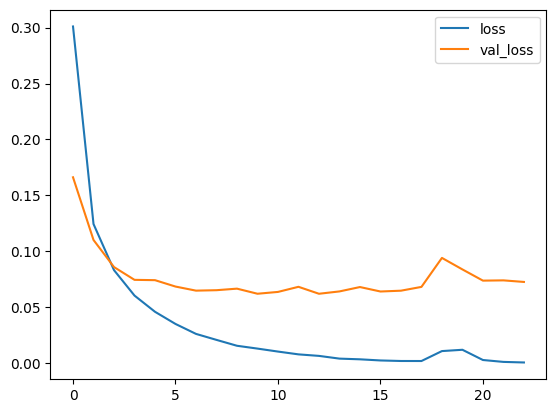

In [44]:
df_history[['loss', 'val_loss']].plot()

<Axes: >

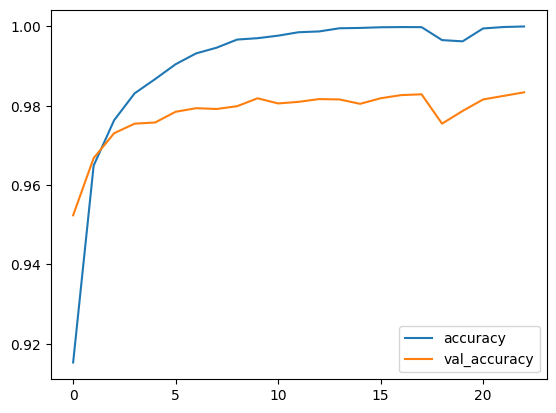

In [47]:
df_history[['accuracy', 'val_accuracy']].plot()

In [ ]:
#############################################
# 저장된 모델로 검증하기
############################################# 

In [48]:
modelpath

'./model/mnist_model.keras'

In [49]:
from tensorflow.keras.models import load_model
model_mnist = load_model(modelpath)

In [50]:
model_mnist.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,221,152 (4.66 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)

In [53]:
model_mnist.predict(X_te[:5]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([7, 2, 1, 0, 4], dtype=int64)

In [55]:
X_tr[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
import PIL
img = PIL.Image.open('./data/3.jpg')
img

In [60]:
np_img = np.array(img)
np_img.shape

(28, 28, 3)

In [63]:
## 흑백으로 만들기
img_bw = img.convert('L')
np.array(img_bw).shape

(28, 28)

In [66]:
np_img[:, :, 0].shape  # Red Channel 하나만으로 BW만들기

(28, 28)

In [67]:
PIL.Image.fromarray(np_img[:, :, 0])

In [69]:
## 손글씨 숫자 3 numpy array (흰색바탕 검은 글씨)
np_img_bw = np.array(img_bw)
np_img_bw

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 255,
        253, 255, 252, 252, 255, 255, 254, 255, 254, 254, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 252, 255, 253,
        253, 255, 255, 255, 255, 255, 255, 255, 253, 255, 254, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 253, 255, 254, 254,
        255,   0, 255, 255, 252, 252, 254, 255, 255, 254, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 253,   2,   2,
          0,   0,   1,   2, 255, 255, 255, 252, 254, 255, 254, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 253,   0,   0,   0,
          2,   2,   0,   0,   0, 255, 255, 255, 252, 254, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 251,   0,   2,   0,   0,
          0,   0,   1,   0,   6,   0, 248, 255, 255, 255, 253, 255, 255,
        255, 255],
       [25

In [71]:
X_tr.shape  # 학습 데이터와 같은 모양으로 테스트 데이터를  만들어 주어야 합니다.

(60000, 784)

In [76]:
np_img_bw_784 = np_img_bw.reshape(-1, 784)  #
np_img_bw_784.shape

(1, 784)

In [78]:
model.predict(np_img_bw_784)    ## 틀렸음!!! 왜? : 반전된 이미지로  예측했기 때문?

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [84]:
## 이미지 반전시키기
np_img_bw = 255 - np_img[:, :, 0]
np_img_bw_784 = np_img_bw.reshape(-1, 784)  #
np_img_bw_784.shape

(1, 784)

In [85]:
model.predict(np_img_bw_784)  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [87]:
predicted = model.predict(np_img_bw_784).argmax(-1)
predicted

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([3], dtype=int64)

In [90]:
print("예측된 숫자는 {}입니다.".format(predicted[0]))

예측된 숫자는 3입니다.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Y값 = 1
예측값 = 1
###### 정답!!! ######


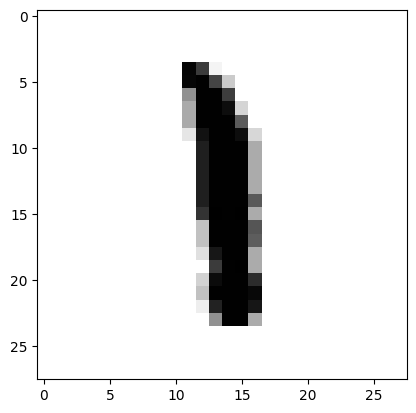

In [95]:
###############################################################
# 검증하기 : n번째 데이터 검증
###############################################################
n = 777
predicted = model.predict(X_test[n].reshape(-1, 28*28)).argmax()
predicted

print("Y값 =", Y_test[n].argmax())
print("예측값 =", predicted)
if Y_test[n].argmax() == predicted:
    print("###### 정답!!! ######")
else:
    print("@@@ 오답 @@@")
plt.imshow(X_test[n].reshape(28, 28), cmap='Greys' )  
plt.show()

@@@ 오답 @@@
Y값 4 != 예측값 9


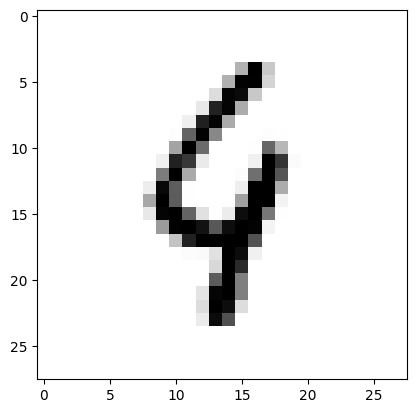

@@@ 오답 @@@
Y값 2 != 예측값 9


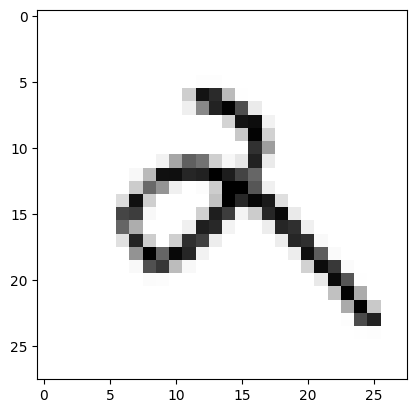

@@@ 오답 @@@
Y값 4 != 예측값 2


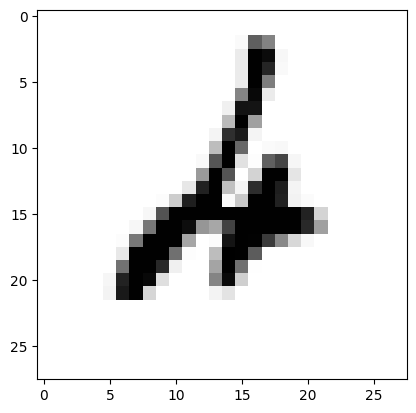

@@@ 오답 @@@
Y값 2 != 예측값 7


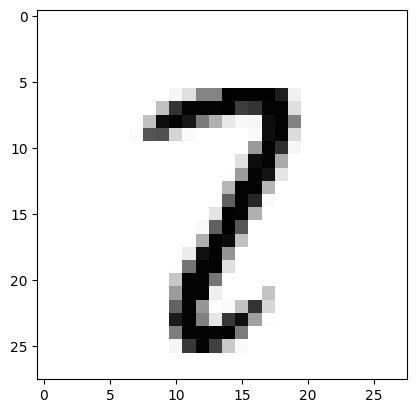

@@@ 오답 @@@
Y값 5 != 예측값 3


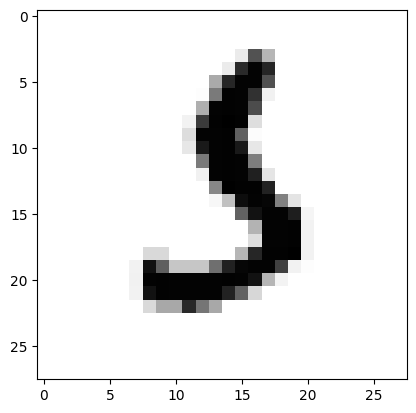

@@@ 오답 @@@
Y값 6 != 예측값 0


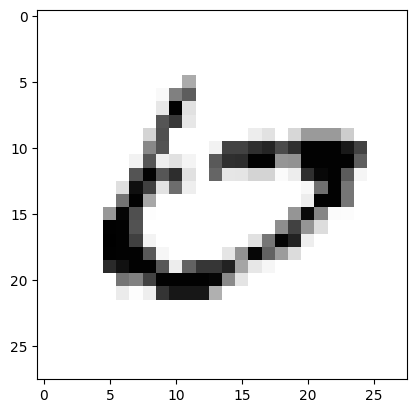

@@@ 오답 @@@
Y값 8 != 예측값 2


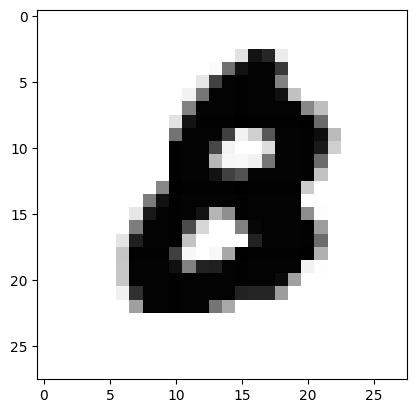

@@@ 오답 @@@
Y값 8 != 예측값 2


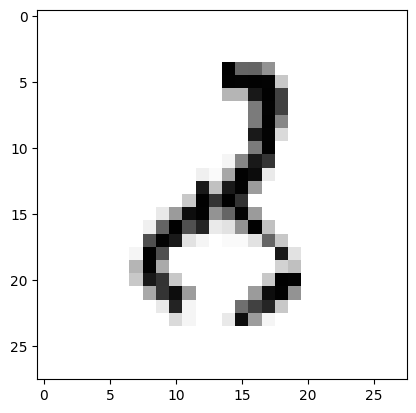

@@@ 오답 @@@
Y값 1 != 예측값 8


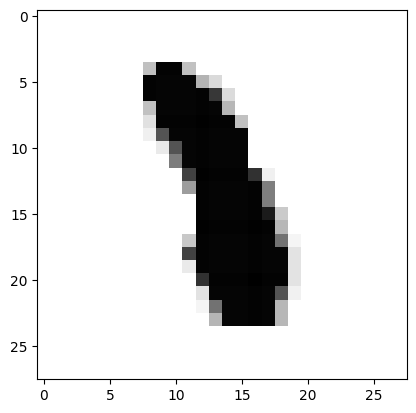

@@@ 오답 @@@
Y값 2 != 예측값 1


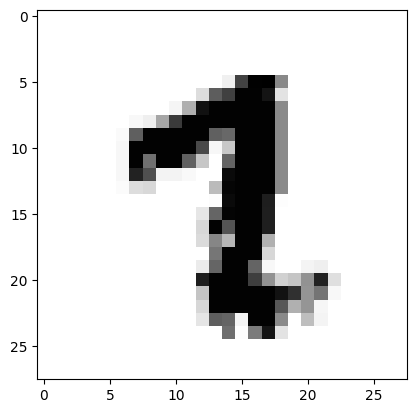

@@@ 오답 @@@
Y값 7 != 예측값 3


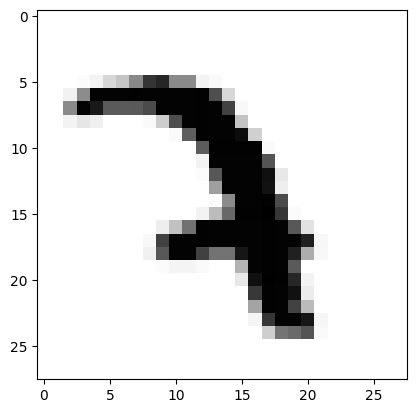

@@@ 오답 @@@
Y값 8 != 예측값 4


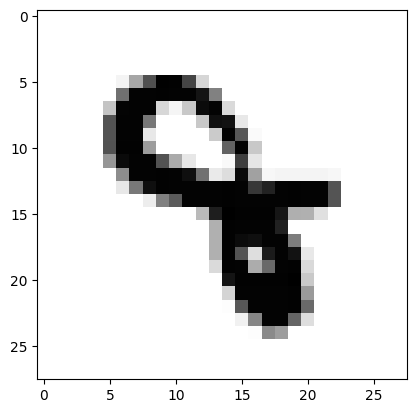

@@@ 오답 @@@
Y값 5 != 예측값 8


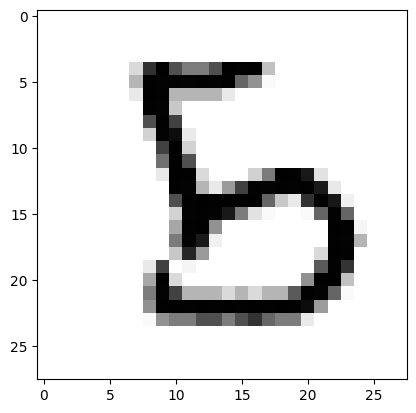

@@@ 오답 @@@
Y값 8 != 예측값 9


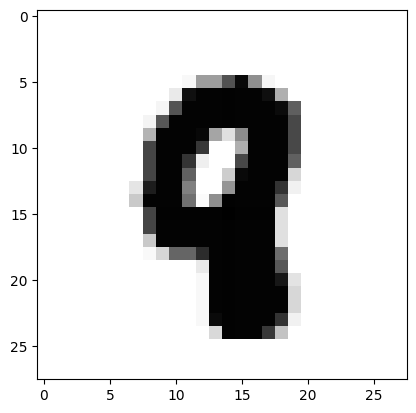

@@@ 오답 @@@
Y값 5 != 예측값 4


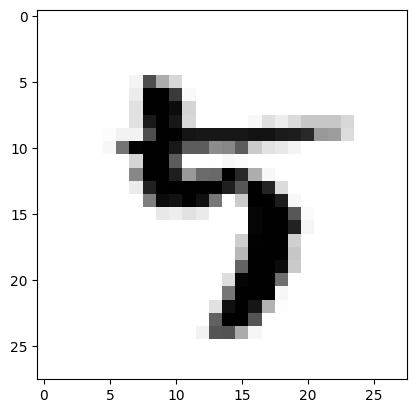

@@@ 오답 @@@
Y값 1 != 예측값 2


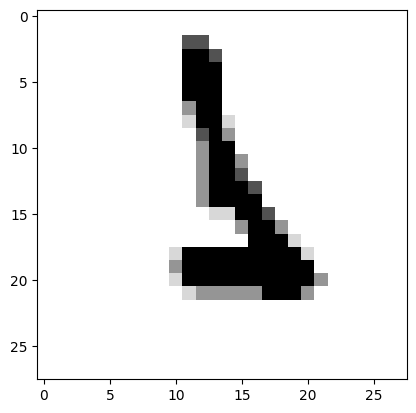

@@@ 오답 @@@
Y값 6 != 예측값 0


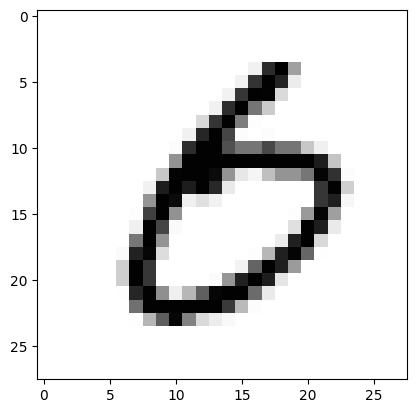

@@@ 오답 @@@
Y값 6 != 예측값 5


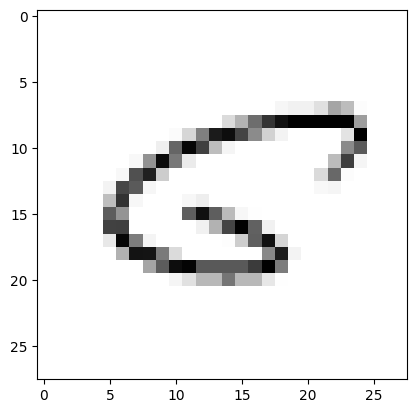

@@@ 오답 @@@
Y값 7 != 예측값 2


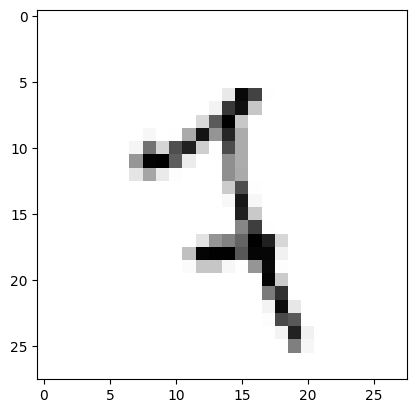

@@@ 오답 @@@
Y값 4 != 예측값 6


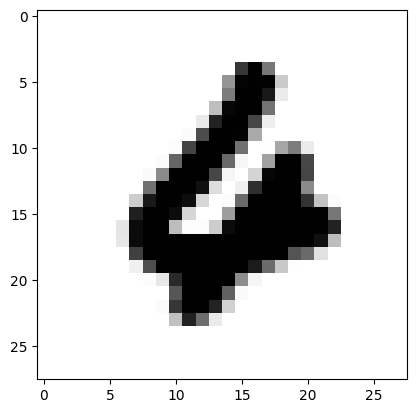

In [97]:
#############################################################
# Test data 중 오답 print
#############################################################
error_cnt = 0  # 20개만 찾고 중단 (시간 문제)
for i in range(len(X_test)):
    predicted = model.predict(X_test[i].reshape(-1, 28*28), verbose=0).argmax()
    if Y_test[i].argmax() != predicted:
        error_cnt += 1
        print("@@@ 오답 @@@")
        print(f"Y값 {Y_test[i].argmax()} != 예측값 {predicted}")
        plt.imshow(X_test[i].reshape(28, 28), cmap='Greys' )  
        plt.show()
        if error_cnt >= 20:  # 10개만 찾아 보기
            break

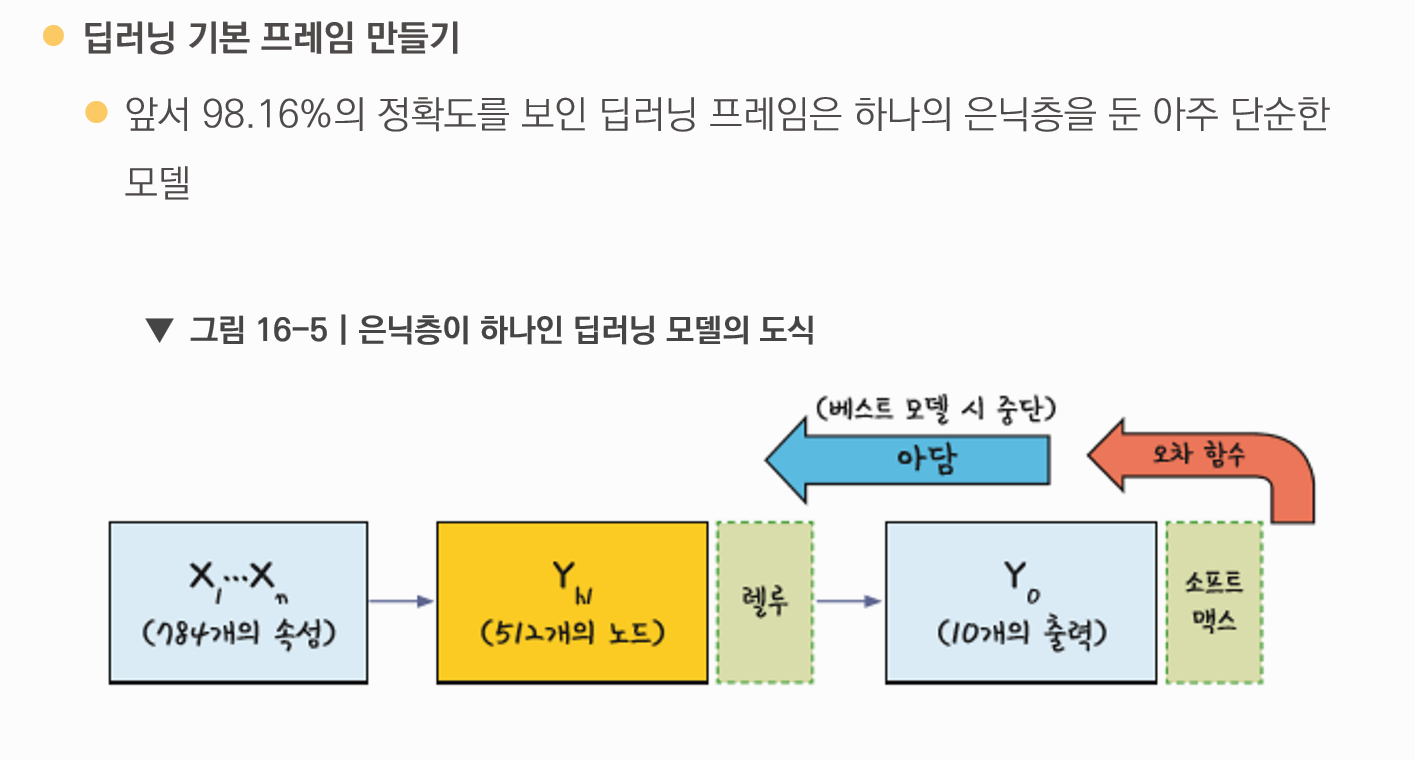

In [157]:
#############################################################
# MNIST ; X data를 0~1로 정규화하지 않고 학습 ( /255로 안나눔 )
# 위와 같은 모델
#############################################################
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import pandas as pd

# MNIST데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [158]:
## 0~1로 정규화 하지 않은 X data
X_train.max(), X_test.max()

(255, 255)

In [159]:
X_train.shape

(60000, 28, 28)

In [160]:
## 정규화하지 않은 0~255 값이 있는  이미지 데이터를 flatten만 한 것
X_train_f = X_train.reshape(-1, 784)
X_test_f = X_test.reshape(-1, 784)
X_train_f.shape, X_test_f.shape

((60000, 784), (10000, 784))

In [161]:
Y_class_train, Y_class_test ## one_hot encoding하지 않은 Y_data

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [162]:
# model 설계 (다중분류) : 위의 코드와 동일
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))  # input_dim=784의 갯수는 X_train_f의 Column의 갯수와 동일해야함.
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [165]:
## sparse_categorical_crossentropy : 자동으로 y_data를 원핫인코딩해줌
# 이제 학습을 시키는 단계
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [166]:
history=model.fit(X_train_f, Y_class_train, validation_split=0.25, epochs=20, batch_size=200, verbose=1)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8177 - loss: 14.2440 - val_accuracy: 0.9311 - val_loss: 1.7947
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9494 - loss: 1.0332 - val_accuracy: 0.9432 - val_loss: 1.2379
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9674 - loss: 0.5103 - val_accuracy: 0.9541 - val_loss: 0.9870
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9761 - loss: 0.2877 - val_accuracy: 0.9550 - val_loss: 0.9458
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9823 - loss: 0.1970 - val_accuracy: 0.9585 - val_loss: 0.9071
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9827 - loss: 0.1898 - val_accuracy: 0.9576 - val_loss: 0.9305
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9854 - loss: 0.1571 - val_accuracy: 0.9579 - val_loss: 0.9573
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9859 - loss: 0.1630 - val_acc

In [168]:
model.evaluate(X_test_f, Y_class_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9648 - loss: 0.9539


[0.8200531005859375, 0.9704999923706055]

In [167]:
predicted = model.predict(X_test_f)
predicted  # one hot encoding이 된 형태의 softmax 통과 값 (클래스별 확률 값)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [148]:
Y_class_test  # 원래 y데이터 상태는 이럼 / + One_hot_encoding 안한 상태

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [149]:
predicted.shape

(10000, 10)

In [150]:
predicted.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [1]:
## 예측된 데이터와 lable(정답)이 shape가 달라서 model.evaluate에서 에러 발생

In [153]:
## accuracy는...
(predicted.argmax(axis=1) == Y_class_test).mean()

0.9653

<Axes: >

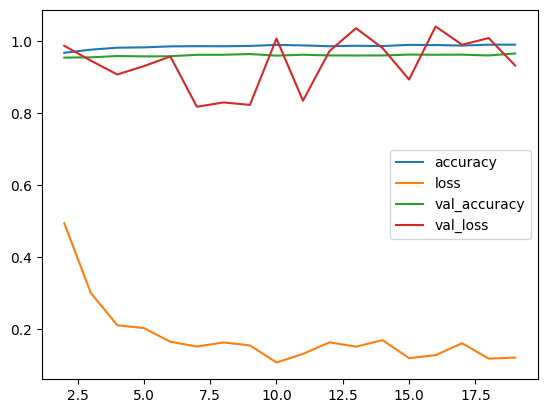

In [173]:
import pandas as pd
pd.DataFrame(history.history)[2:].plot()

In [ ]:
## Visual Studio Code : Jupyter Notebook 